## Step 1: data import
removed molecules are masked in this step

In [1]:
#load pandas and numpy modules
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
#read raw data
df = pd.read_csv('merged_data.csv')

if df.isnull().values.any():
    print ('missing values!')
    #raise ValueError
else:
    print('pass')

#removed_mol = ["ASD007", "ASD012", "ASD019", "ASD021", "D372-0163"]
#df = df[~df['MolID'].isin(removed_mol)]

df.head()

missing values!


,mol,Compound Number,mseq,Accum,Accum_SE,Accum_class,Excluded,ASA,ASA+,ASA-,...,vsurf_Wp2,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb
0,S(=O)(=O)(OC1C2OCC([N+])C2OC1)c1ccc(-c2ccccc2)cc1,4-1,1,1965.0,108.0,High,F,589.37537,375.03711,209.781050,...,491.18533,131.98276,37.599136,12.189655,0.918103,0.000000,0.0,1607,39,138
1,O(C)c1c(O)c2c(cc1)CC1[N+](C)CCC32C1CC(O)C([N+])C3,4-2,2,1913.0,156.0,High,F,514.13593,450.86008,63.275837,...,493.00000,180.00000,51.000000,15.375000,2.375000,0.125000,0.0,976,50,134
2,OC12C(=C)CC3(C(CC[N+])c4c(C)cccc4C3CC1)C2,4-3,3,1887.0,179.0,High,F,494.43210,349.70044,144.731660,...,431.03571,140.42857,39.464287,12.125000,1.375000,0.053571,0.0,753,44,126
3,O=C1C2(C)CC3(C(C[N+])c4c(C)cccc4C3CC2)C1,4-3a,64,1696.0,203.0,High,F,471.00363,323.49649,147.507140,...,362.12500,112.43750,32.125000,9.750000,0.812500,0.000000,0.0,650,43,122
4,OC12C(C)CC3(C(C[N+])c4c(C)cccc4C3CC1)C2,4-4,4,1650.0,69.0,High,F,479.01715,346.60675,132.410400,...,404.91666,133.16667,37.250000,10.958333,1.250000,0.041667,0.0,650,43,122


### Specify X and Y

In [7]:
Y = df.iloc[:,5]
Y = Y.dropna() # drop row if NaN in Y
b_class = {'Low': 0, 'High': 1}
Yb = Y.map(b_class)
#Yb = (Y > np.median(Y)).astype(int) # binary classification split by median
Yb#.sum()

0     1
1     1
2     1
3     1
4     1
     ..
63    0
64    0
65    0
66    0
67    0
Name: Accum_class, Length: 68, dtype: int64

In [8]:
# y_column = 'PAO1_A2_80'
# PAO1_A1_s/PAO1_A2_s
# threshold = 100
# A1/A2 amplitudes
# threshold = 100

#print("target=", y_column, "threshold=", threshold)
#Y = df[y_column].apply(lambda x:0 if x < threshold else 1)
#X_raw = df.iloc[:,5:]
#df.insert(loc=5, column="Y", value=Y)
X_raw = df.iloc[:,7:]
X_raw = X_raw.drop(index=NANrow)
X_raw.head()

,ASA,ASA+,ASA-,ASA_H,ASA_P,BCUT_PEOE_0,BCUT_PEOE_1,BCUT_PEOE_2,BCUT_PEOE_3,BCUT_SLOGP_0,...,vsurf_Wp2,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb
0,589.37537,375.03711,209.781050,444.04636,145.32903,-2.525216,-0.572012,0.639683,2.857105,-3.317452,...,491.18533,131.98276,37.599136,12.189655,0.918103,0.000000,0.0,1607,39,138
1,514.13593,450.86008,63.275837,371.82449,142.31142,-2.933136,-0.446061,0.582079,2.956264,-3.514344,...,493.00000,180.00000,51.000000,15.375000,2.375000,0.125000,0.0,976,50,134
2,494.43210,349.70044,144.731660,367.01440,127.41769,-2.786666,-0.401922,0.504723,2.929054,-3.286977,...,431.03571,140.42857,39.464287,12.125000,1.375000,0.053571,0.0,753,44,126
3,471.00363,323.49649,147.507140,364.81686,106.18677,-2.798107,-0.311067,0.448598,2.949188,-3.289287,...,362.12500,112.43750,32.125000,9.750000,0.812500,0.000000,0.0,650,43,122
4,479.01715,346.60675,132.410400,367.38467,111.63245,-2.785383,-0.409369,0.503576,2.968379,-3.289323,...,404.91666,133.16667,37.250000,10.958333,1.250000,0.041667,0.0,650,43,122


## Step 2: scale data
two ways: normalization and robustscaler

In [9]:
# scale data using robust scaler
from sklearn.preprocessing import RobustScaler, StandardScaler

#scaler = StandardScaler()
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_raw), columns=X_raw.columns)

X_scaled.head()

,ASA,ASA+,ASA-,ASA_H,ASA_P,BCUT_PEOE_0,BCUT_PEOE_1,BCUT_PEOE_2,BCUT_PEOE_3,BCUT_SLOGP_0,...,vsurf_Wp2,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,weinerPath,weinerPol,zagreb
0,0.790739,0.174851,1.392767,1.098846,0.118088,0.774540,-0.548485,0.676175,-0.026038,-0.368674,...,1.090637,0.101928,0.030120,-0.008310,-0.457853,0.000000,0.0,1.012771,0.021277,0.38
1,0.101503,0.822732,-1.453412,0.083103,0.064896,-0.570121,-0.008753,0.385990,0.415770,-3.755058,...,1.113449,1.435427,1.322267,0.701028,0.542637,3.720280,0.0,0.206897,0.489362,0.30
2,-0.078995,-0.041643,0.129042,0.015453,-0.197641,-0.087301,0.180394,-0.003697,0.294532,0.155464,...,0.334497,0.336479,0.209963,-0.022708,-0.144090,1.594406,0.0,-0.077905,0.234043,0.14
3,-0.293613,-0.265547,0.182962,-0.015453,-0.571886,-0.125014,0.569728,-0.286431,0.384240,0.115737,...,-0.531779,-0.440869,-0.497711,-0.551593,-0.530374,0.000000,0.0,-0.209451,0.191489,0.06
4,-0.220205,-0.068077,-0.110325,0.020661,-0.475893,-0.083072,0.148481,-0.009476,0.469748,0.115109,...,0.006155,0.134806,-0.003545,-0.282511,-0.229931,1.240093,0.0,-0.209451,0.191489,0.06


## Step 3: feature selection
clustering method (kmeans), correlation method, PCA and LDA

### Manually select features

In [8]:
# pre-deleted features
pre_drop = ['BertzCT','ExactMolWt','Ipc','NHOHCount','NOCount','NumRadicalElectrons','NumSaturatedCarbocycles','NumSaturatedHeterocycles','NumSaturatedRings','NumValenceElectrons','PEOE_VSA1','PEOE_VSA2','PEOE_VSA3','PEOE_VSA4','PEOE_VSA5','PEOE_VSA6','PEOE_VSA7','PEOE_VSA8','PEOE_VSA9','PEOE_VSA10','PEOE_VSA11','PEOE_VSA12','PEOE_VSA13','PEOE_VSA14','RingCount','SMR_VSA1','SMR_VSA2','SMR_VSA3','SMR_VSA4','SMR_VSA5','SMR_VSA6','SMR_VSA7','SMR_VSA8','SMR_VSA9','SMR_VSA10','SlogP_VSA1','SlogP_VSA2','SlogP_VSA3','SlogP_VSA4','SlogP_VSA5','SlogP_VSA6','SlogP_VSA7','SlogP_VSA8','SlogP_VSA9','SlogP_VSA10','SlogP_VSA11','SlogP_VSA12','VSA_EState1','VSA_EState2','VSA_EState3','VSA_EState4','VSA_EState5','VSA_EState6','VSA_EState7','VSA_EState8','VSA_EState9','VSA_EState10','qed','fr_Al_COO','fr_Al_OH','fr_Al_OH_noTert','fr_ArN','fr_Ar_COO','fr_Ar_N','fr_Ar_NH','fr_Ar_OH','fr_COO','fr_COO2','fr_C_O','fr_C_O_noCOO','fr_C_S','fr_HOCCN','fr_Imine','fr_NH0','fr_NH1','fr_NH2','fr_N_O','fr_Ndealkylation1','fr_Ndealkylation2','fr_Nhpyrrole','fr_SH','fr_aldehyde','fr_alkyl_carbamate','fr_alkyl_halide','fr_allylic_oxid','fr_amide','fr_amidine','fr_aniline','fr_aryl_methyl','fr_azide','fr_azo','fr_barbitur','fr_benzene','fr_benzodiazepine','fr_bicyclic','fr_diazo','fr_dihydropyridine','fr_epoxide','fr_ester','fr_ether','fr_furan','fr_guanido','fr_halogen','fr_hdrzine','fr_hdrzone','fr_imidazole','fr_imide','fr_isocyan','fr_isothiocyan','fr_ketone','fr_ketone_Topliss','fr_lactam','fr_lactone','fr_methoxy','fr_morpholine','fr_nitrile','fr_nitro','fr_nitro_arom','fr_nitro_arom_nonortho','fr_nitroso','fr_oxazole','fr_oxime','fr_para_hydroxylation','fr_phenol','fr_phenol_noOrthoHbond','fr_phos_acid','fr_phos_ester','fr_piperdine','fr_piperzine','fr_priamide','fr_prisulfonamd','fr_pyridine','fr_quatN','fr_sulfide','fr_sulfonamd','fr_sulfone','fr_term_acetylene','fr_tetrazole','fr_thiazole','fr_thiocyan','fr_thiophene','fr_unbrch_alkane','fr_urea','Eccentricity']

X_scaled.drop(columns = pre_drop, inplace=True)
FullFeature = X_scaled.columns.values.tolist()
print('# of features for next step:', X_scaled.shape[1])

# of features for next step: 66


### kmeans (under develope)

=====Best cluster=====
19 clusters, silhouette score: 0.30564431729265934


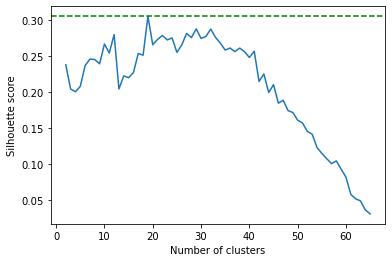

In [19]:
# dimension reduction with clustering methods
# higher silhouette score means better clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_before = X_array.T # feature as sample, sample as feature
Best_cluster = (0,0)
num_of_cluster = range(2,X_before.shape[0])
sil_coeff_list = []
for i in num_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_before)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_before, label, metric='euclidean')
    sil_coeff_list.append(sil_coeff)
    if sil_coeff > Best_cluster[1]:
        Best_cluster = (i, sil_coeff)
print("=====Best cluster=====")
print(f"{Best_cluster[0]} clusters, silhouette score: {Best_cluster[1]}")
plt.plot(num_of_cluster, sil_coeff_list)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.axhline(y=Best_cluster[1], color='g', linestyle='--')
plt.show()

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import cm
import matplotlib.colors as colors

def PCA_plot(X, Y_class, centers):
    pca = PCA(n_components=3, svd_solver='full').fit(X)
    X_pca = pca.transform(X)
    centers_pca = pca.transform(centers)
    cNorm  = colors.Normalize(vmin=0.1, vmax=Y_class.max()) # normalize color scale
    color_by_class = cm.ScalarMappable(norm=cNorm, cmap='jet') # assign color for a scaler
    # 3d
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca(projection='3d')
    ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=Y_class, cmap='jet', edgecolors='k', norm=cNorm)
    ax.scatter(centers_pca[:,0], centers_pca[:,1], centers_pca[:,2], cmap='jet', c=range(len(centers)), marker='x') # map cluster centers

    for xx_row, yy_class in zip(X_pca, Y_class):
        ax.plot([xx_row[0], centers_pca[yy_class,0]], [xx_row[1], centers_pca[yy_class,1]], [xx_row[2], centers_pca[yy_class,2]], c=color_by_class.to_rgba(yy_class))
    ax.set_xlabel(f"PC1-{np.round(pca.explained_variance_ratio_[0],3)}")
    ax.set_ylabel(f"PC2-{np.round(pca.explained_variance_ratio_[1],3)}")
    ax.set_zlabel(f"PC3-{np.round(pca.explained_variance_ratio_[2],3)}")
    # cbar = plt.colorbar(scatter3D)
    # cbar.set_label('A2_pore/wt ratio', rotation=270, va='bottom')
    # for i in range(X_pca.shape[0]):
    # ax.text(X_pca[i,0], X_pca[i,1], X_pca[i,2], str(i))
    plt.show()

    # 2D
    fig = plt.figure(figsize=(10,8))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=Y_class, cmap='jet', edgecolors='k', norm=cNorm)
    plt.scatter(centers_pca[:,0], centers_pca[:,1], cmap='jet', c=range(len(centers)), marker='x')

    for xx_row, yy_class in zip(X_pca, Y_class):
        plt.plot([xx_row[0], centers_pca[yy_class,0]], [xx_row[1], centers_pca[yy_class,1]], c=color_by_class.to_rgba(yy_class))
    plt.xlabel(f"PC1-{np.round(pca.explained_variance_ratio_[0],3)}")
    plt.ylabel(f"PC2-{np.round(pca.explained_variance_ratio_[1],3)}")
    # cbar = plt.colorbar(scatter2D)
    # cbar.set_label('A2_pore/wt ratio', rotation=270, va='bottom')
    plt.show()
    # annotate each point

    plt.show()

    #pca_contribution = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])
    #print(pca_contribution)

    return 0

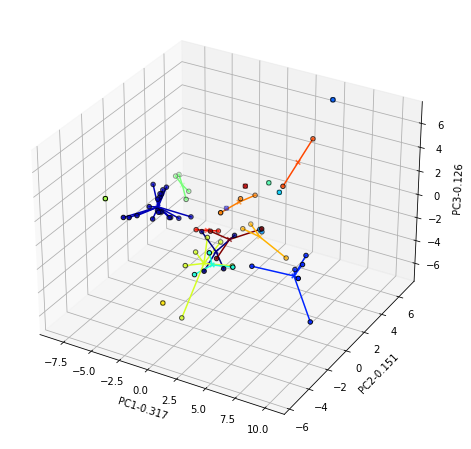

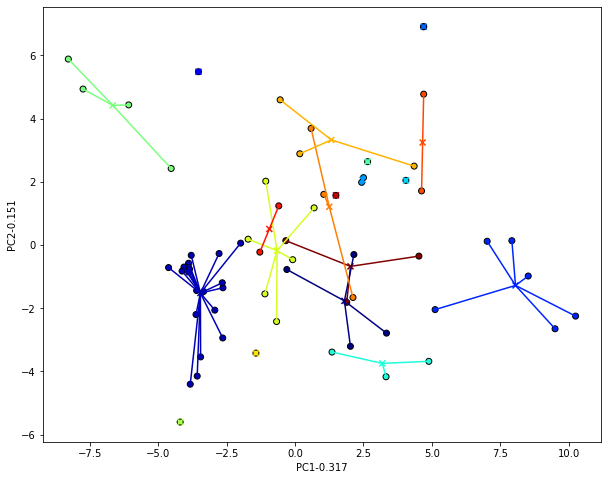

In [20]:
kmean = KMeans(n_clusters=19, random_state=0).fit(X_before)
Y_class = kmean.labels_
centers = kmean.cluster_centers_
PCA_plot(X_before, Y_class, centers)
dist2centroid = []
for point, classnum in zip(X_before, Y_class):
    dist2centroid.append(np.round(np.linalg.norm(point-centers[classnum]),3))
PCA_result = pd.DataFrame.from_dict({'feature':FullFeature, 'class':Y_class, 'dist2centroid':dist2centroid})

In [21]:
# extract featrues that are closest to the cluster centers
PCA_result = PCA_result.sort_values(['class', 'dist2centroid'], ascending=[True, True])
select_features = []
init_class = None
for _, row in PCA_result.iterrows():
    if row['class'] != init_class:
        select_features.append(row['feature'])
        init_class = row['class']
print(select_features)

['NumAliphaticCarbocycles', 'Chi0n', 'NumHDonors', 'FpDensityMorgan2', 'MaxAbsEStateIndex', 'MaxPartialCharge', 'EState_VSA11', 'NPR1', 'EState_VSA2', 'PMI3', 'PMI1', 'EState_VSA8', 'MinEStateIndex', 'NPR2', 'NumHeteroatoms', 'EState_VSA1', 'Kappa3', 'EState_VSA3', 'MolLogP']


In [39]:
# for _, line in PCA_result.iterrows():
#     print(line.values)

In [9]:
#descriptors = ['FpDensityMorgan2', 'LabuteASA', 'MaxAbsEStateIndex', 'TPSA', 'EState_VSA7', 'Asphericity', 'Chi3v', 'MaxPartialCharge', 'PMI2', 'MaxAbsPartialCharge', 'NPR1', 'EState_VSA4', 'MinPartialCharge', 'Kappa3', 'MolLogP', 'NumHAcceptors', 'EState_VSA1', 'FractionCSP3', 'EState_VSA11', 'EState_VSA5', 'NumAliphaticCarbocycles', 'EState_VSA2', 'EState_VSA6', 'NumAromaticHeterocycles', 'EState_VSA9', 'BalabanJ', 'HallKierAlpha', 'EState_VSA3', 'MinAbsEStateIndex', 'EState_VSA8', 'InertialShapeFactor', 'NumAromaticCarbocycles', 'NumAliphaticHeterocycles']
descriptors = ['NumAliphaticCarbocycles', 'Chi0n', 'NumHDonors', 'FpDensityMorgan2', 'MaxAbsEStateIndex', 'MaxPartialCharge', 'EState_VSA11', 'NPR1', 'EState_VSA2', 'PMI3', 'PMI1', 'EState_VSA8', 'MinEStateIndex', 'NPR2', 'NumHeteroatoms', 'EState_VSA1', 'Kappa3', 'EState_VSA3', 'MolLogP']
X_given = X_scaled[descriptors]

### Big image to show correlation of X and Y

In [23]:
# import seaborn as sns

# print('# of features before drop:', X_raw.shape[1])

# #create correlation matrix
# corr_matrix_before = X_raw.corr()#.abs() # absolute value of corralation matrix

# #plot heatmap before removing highly correlated features
# fig = plt.figure(figsize=(64,56))
# fig = sns.heatmap(corr_matrix_before, cmap = 'vlag', square=True, cbar_kws={"shrink": .82})
# plt.title('Features before removal' ,fontsize = 40)
# plt.tight_layout()
# #plt.savefig(img_dir + 'corr_matrix_before.png')

### correlation method

In [10]:
import seaborn as sns

print('# of features before drop:', X_scaled.shape[1])
#create correlation matrix
corr_matrix_before = X_scaled.corr().abs() # absolute value of corralation matrix

#plot heatmap before removing highly correlated features
# fig = plt.figure(figsize=(11,9))
# fig = sns.heatmap(corr_matrix_before, cmap = 'Blues', square=True)
# plt.title('Features before removal' ,fontsize = 20)
# plt.tight_layout()

#set a cutoff threshold (usually 0.9 or 0.85)
cut_th = 0.9

#select upper triangle of correlation matrix
upper = corr_matrix_before.where(np.triu(np.ones(corr_matrix_before.shape), k=1).astype(bool)) # first build a boolean upper triangle, then use where() to extract upper triangle from correlation matrix

#drop highly correlated features based on set threshold
to_drop = [column for column in upper.columns if any(upper[column] > cut_th)] # remove columns that has correlation with any value larger than threshold
'''two problems: 1. if multiple features are correlated, only the first one is kept; 2. may remove too many features, since the removal of "bridge" feature makes the rest features non-correlated'''
#to_drop.extend(["Ipc", "EState_VSA5"]) # brings to much variation
X_cor = X_scaled.drop(columns = to_drop)

#plot heatmap after removing highly correlated features
corr_matrix_after = X_cor.corr().abs()
# f, ax = plt.subplots(figsize=(11, 9))
# ax = sns.heatmap(corr_matrix_after, cmap = 'Blues', square=True)
# plt.title('Features after removal' ,fontsize = 20)
# plt.tight_layout()
#plt.savefig(img_dir + 'corr_matrix_after.png')

print('# of features after drop:', X_cor.shape[1])
print('# of features dropped:', len(to_drop))
print("Dropped features:")
print(to_drop)

# of features before drop: 297
# of features after drop: 149
# of features dropped: 148
Dropped features:
['BCUT_SLOGP_1', 'BCUT_SLOGP_2', 'BCUT_SMR_0', 'BCUT_SMR_1', 'BCUT_SMR_2', 'BCUT_SMR_3', 'CASA+', 'DCASA', 'FASA-', 'FASA_P', 'FCASA+', 'FCASA-', 'GCUT_PEOE_3', 'GCUT_SLOGP_3', 'GCUT_SMR_0', 'GCUT_SMR_1', 'GCUT_SMR_2', 'GCUT_SMR_3', 'Kier1', 'Kier3', 'KierA1', 'KierA2', 'KierA3', 'KierFlex', 'MolWt', 'PEOE_RPC+', 'PEOE_RPC-', 'PEOE_VSA_FPOL', 'PEOE_VSA_FPOS', 'PEOE_VSA_HYD', 'PEOE_VSA_PNEG', 'RB', 'SMR', 'SlogP_VSA1', 'SlogP_VSA3', 'TPSA', 'VAdjEq', 'VAdjMa', 'VDistMa', 'VSA', 'a_IC', 'a_base', 'a_count', 'a_donacc', 'a_heavy', 'a_nC', 'a_nF', 'a_nH', 'apol', 'b_1rotN', 'b_1rotR', 'b_ar', 'b_count', 'b_heavy', 'b_rotN', 'b_rotR', 'b_single', 'bpol', 'chi0', 'chi0_C', 'chi0v', 'chi0v_C', 'chi1', 'chi1_C', 'chi1v', 'chi1v_C', 'dens', 'density', 'diameter', 'h_ema', 'h_logS', 'h_mr', 'h_pavgQ', 'lip_acc', 'logP(o/w)', 'mr', 'opr_nring', 'opr_nrot', 'petitjeanSC', 'pmi', 'pmi1', 'pmi1_

### VIF method (under develope)

In [53]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# print(np.diag(np.linalg.inv(np.corrcoef(X_scaled, rowvar=0)))) # calculate vif
# print(np.array(X_scaled.columns)[np.diag(np.linalg.inv(np.corrcoef(X_scaled, rowvar=0)))<5]) # vif > 5 means colinear
# #X_vif = add_constant(X_scaled)
# #pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)

### Train-test split and LDA

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def data_split(X, Y, test_size, random_state=0):
    if not (type(X) is np.ndarray):
        X = X.to_numpy()
    if not (type(Y) is np.ndarray):
        Y = Y.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = test_size, random_state=random_state)

    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = data_split(X_cor, Yb, 0.2)
#X_train, X_test, Y_train, Y_test = data_split(X_given, Yb, 0.2)
# print(X_train)
# print(X_test)
# lda = LDA().fit(X_train, Y_train)
# X_trainl = lda.transform(X_train)
# X_testl = lda.transform(X_test)

In [12]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=42, shuffle=True)
i = 0
for train_index, test_index in cv.split(X_train):
    print(f"## {i}th cross-valiation")
    print("----- X_train -----")
    print(df['MolID'].take(X_train.index[train_index]))
    print("----- X_test -----")
    print(df['MolID'].take(X_train.index[test_index]))

## 0th cross-valiation
----- X_train -----


KeyError: 'MolID'

In [47]:
index_list = list(X_train.index[train_index])
#print(index_list)
df['MolID'].take(index_list)

71         ST038872
46       DP-0000558
3           1503100
74         ST045323
7           1505622
81         ST074710
85        linezolid
48       DP-0000560
4           1503243
21        D372-0005
68         ST002653
8           1506043
64        NSC_72382
43       DP-0000553
61        NSC_70691
33       DP-0000375
59        NSC_67735
10          2300307
36       DP-0000490
50       DP-0000563
83        D724-0097
1           1501007
73         ST045207
18        D300-0069
57        NSC_66761
24        D389-0855
34       DP-0000481
65        NSC_72564
54        G414-1139
29       DP-0000273
40       DP-0000548
0           1500272
84    ciprofloxacin
19        D300-0109
67         ST001786
20        D372-0004
56        NSC_66754
25        D389-0970
80         ST057338
30       DP-0000274
42       DP-0000552
51        G210-2547
70         ST024061
12           ASD002
75         ST049791
41       DP-0000551
26       DP-0000267
9           2300173
82         ST074716
72         ST044917


## tuned hyperparameters

In [ ]:
#PAO1_A1_s
GBDT_tuned_params = {"max_features":'auto',
                  "max_depth": None,
                  "min_samples_leaf" : 16,
                  'learning_rate': 0.03, 
                  'n_estimators': 50,
                  "subsample": 0.65
                  }

RF_tuned_params = {'max_depth': None,
                   'max_features': 5,
                   'min_samples_leaf': 2,
                   'n_estimators': 320,
                  }


LR_tuned_params = {'C': 0.01, 
                   'penalty': 'l2', 
                   'solver': 'liblinear'
                  }

SVM_tuned_params = {'C': 1,
                    'gamma': 'auto', 
                    'kernel': 'rbf',
                     'probability': True
                    }

In [5]:
#PAO1_A2_s
GBDT_tuned_params = {"max_features":'auto',
                  "max_depth": None,
                  "min_samples_leaf" : 16,
                  'learning_rate': 0.03, 
                  'n_estimators': 50,
                  "subsample": 0.65
                  }

RF_tuned_params = {'max_depth': None,
                   'max_features': 10,
                   'min_samples_leaf': 16,
                   'n_estimators': 320,
                  }


LR_tuned_params = {'C': 5, 
                   'penalty': 'l1', 
                   'solver': 'liblinear'
                  }

SVM_tuned_params = {'C': 1,
                    'gamma': 0.001, 
                    'kernel': 'rbf',
                     'probability': True
                    }

In [27]:
#PAO1_A2_80
GBDT_tuned_params = {"max_features":'auto',
                  "max_depth": 10,
                  "min_samples_leaf" : 1,
                  'learning_rate': 0.08, 
                  'n_estimators': 250,
                  "subsample": 0.55
                  }

RF_tuned_params = {'max_depth': None,
                   'max_features': 'auto',
                   'min_samples_leaf': 1,
                   'n_estimators': 640,
                  }


LR_tuned_params = {'C': 1, 
                   'penalty': 'l1', 
                   'solver': 'liblinear'
                  }

SVM_tuned_params = {'C': 1,
                    'gamma': 'auto', 
                    'kernel': 'rbf',
                     'probability': True
                    }

In [30]:
#A2_pore/wt with clustering feature selection

# RandomForest
RF_tuned_params = {'max_depth': None,
                   'max_features': 5,
                   'min_samples_leaf': 4,
                   'n_estimators': 320,
                  }

#Best score: 0.6833333333333333
# LogisticRegression
LR_tuned_params = {'C': 5, 
                   'penalty': 'l1', 
                   'solver': 'liblinear'
                  }
#Best score: 0.6738095238095239

In [14]:
#dataset from other paper
# RandomForest
RF_tuned_params = {'max_depth': None,
                   'max_features': 20,
                   'min_samples_leaf': 8,
                   'n_estimators': 160,
                  }

#Best score: 0.8366666666666667
# LogisticRegression
LR_tuned_params = {'C': 1, 
                   'penalty': 'l2', 
                   'solver': 'sag'
                  }
#Best score: 0.8033333333333333


## Step 4: machine learning
Gradient boosting, random forest, logistic regression, support vector machine

In [13]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared

#consider reducing dimensions when hyperparameter tuning if computationally too expensive
#

#GBDT----------------------------
############################################
GBDT_param_grid = {"n_estimators" : range(50,300,50),
                   "max_depth" : [None, 5, 10, 20, 40, 160, 320],
                   "min_samples_leaf" : [1, 2, 4, 8, 16, 32, 64],
                   "learning_rate": np.arange(0.01,0.1,0.01),
                   "subsample": np.arange(0.5,0.9,0.05),
                   "max_features":['auto', 5,10,20,30]
                  }

GBDT = GradientBoostingClassifier(random_state=42)#.set_params(**GBDT_tuned_params)

#GBDT----------------------------
############################################


#RF------------------------------
############################################
RF_param_grid = {"n_estimators" : [160, 320, 640, 1280],
                 "max_depth" : [None, 5, 10, 20, 40, 160, 320],
                 "min_samples_leaf" : [1, 2, 4, 8, 16, 32, 64],
                 "max_features":['auto', 5,10,20,30]
                } 

RF = RandomForestClassifier(random_state=42,n_jobs=-1)#.set_params(**RF_tuned_params)
#RF------------------------------
############################################


#LR------------------------------
############################################
LR_param_grid = {'penalty': ['l1', 'l2'], #note l1 only compatible with liblinear
                 'C':[0.001,0.01,1,5,10],
                'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

LR = LogisticRegression(random_state = 42)#.set_params(**LR_tuned_params)
#LR------------------------------
############################################


#SVM------------------------------
############################################
SVM_param_grid = {'C': [0.1, 1, 10, 100, 1000],  
                 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto', 'scale'], 
                 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                 'probability':[True]
                 }  

SVM = SVC(random_state=42)#.set_params(**SVM_tuned_params)

#SVM------------------------------
############################################

## hyperparameter tuning


In [26]:
from sklearn.metrics import (recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, 
                             auc,roc_auc_score,roc_curve, precision_recall_curve,classification_report)
from sklearn.model_selection import GridSearchCV,train_test_split

#features/target splitting
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

model_list = ["LogisticRegression", "RandomForest"]#"GradientBoosting", "LogisticRegression", "RandomForest", "SupportVectorMachine"
models = [LR, RF]#GBDT, LR, RF, SVM
grids = [LR_param_grid, RF_param_grid]#GBDT_param_grid, LR_param_grid, RF_param_grid, SVM_param_grid

#to test other metrics, uncomment below or add your own metrics

for name, model, grid in zip(model_list, models, grids):
    print(f"# Tuning {name}")
    gs = GridSearchCV(model, param_grid = grid, cv = 10, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, Y_train)

    print("Best parameters set found:\n",gs.best_params_)
    print("Best score:\n", gs.best_score_)

# Tuning LogisticRegression
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.44              nan 0.5        0.67333333
 0.67333333 0.69333333 0.66666667 0.63333333        nan        nan
 0.66              nan 0.56       0.68666667 0.68666667 0.75
 0.75       0.76666667        nan        nan 0.70666667        nan
 0.76666667 0.76       0.76       0.74333333 0.80333333 0.76666667
        nan        nan 0.68666667        nan 0.76666667 0.74333333
 0.74333333 0.70666667 0.80333333 0.76666667        nan        nan
 0.70666667        nan 0.76666667 0.74333333 0.74333333 0.70666667
 0.80333333 0.76666667]
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
Best parameters set found:
 {'C': 1, 'penalty': 'l2', 'solver': '

KeyboardInterrupt: 

In [32]:
## temperory
from sklearn.metrics import accuracy_score
RF = RandomForestClassifier(random_state=42,n_jobs=-1).set_params(**RF_tuned_params)
RF.fit(X_train, Y_train)
pred_test = RF.predict(X_test)
    #pred_test_probs = clf.predict_proba(X_testl)
    #fpr, tpr, thresholds = roc_curve(Y_test,pred_test)

    #f1.append(f1_score(Y_test,pred_test))
    #prec.append(precision_score(Y_test,pred_test))
    #recall.append(recall_score(Y_test,pred_test))
print(accuracy_score(Y_test,pred_test))
    #ROC_AUC.append(roc_auc_score(Y_test, pred_test_probs[:,1]))       
    #conf.append(confusion_matrix(Y_test,pred_test))

0.7647058823529411


In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import (recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, 
                             auc,roc_auc_score,roc_curve, precision_recall_curve,classification_report)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#K-fold validation function will take six arguments: 
#1. model, 2. train set, 3.test set, 4.# of fold, 5.shuffle boolean, 6.random_state.
def kf_cv(clf, X, y, folds = 10, shuf = True, random_state=42):
    cv = KFold(n_splits=folds, random_state=42, shuffle=shuf)
    f1,prec,recall,acc,ROC_AUC,conf = ([],[],[],[],[],[])
    metric_cols=['F1','precision','recall','accuracy','ROC_AUC','confusion_matrix']
    print('Classifier ##{0}## will be used with {1} folds, and shuffle mode is {2}'.format(clf.__class__.__name__,
                                                                                       folds,
                                                                                       'on' if shuf else 'off')
         )
    
    for train_index, test_index in cv.split(X):
        #turn on the below code will print train_index/test_index and may help understand the details and debug.
        #print("Train Index: ", type(train_index), "\n")
        #print("Test Index: ", test_index)
        
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        #if sampling method is used, use this to avoid warnings: clf.fit(X_train.values, y_train.values.ravel())
        clf.fit(X_train, y_train.ravel())
        
        pred_test = clf.predict(X_test)
        pred_test_probs = clf.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test,pred_test)
        
        f1.append(f1_score(y_test,pred_test))
        prec.append(precision_score(y_test,pred_test))
        recall.append(recall_score(y_test,pred_test))
        acc.append(accuracy_score(y_test,pred_test))
        ROC_AUC.append(roc_auc_score(y_test, pred_test_probs[:,1]))       
        conf.append(confusion_matrix(y_test,pred_test))

        plt.plot(fpr, tpr) # plot ROC curve
    
    plt.axline([0, 0], [1, 1], linewidth=1, color='k', linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    #return a dataframe consisting five metrics and confusion matrix.
    return pd.DataFrame(zip(f1,prec,recall,acc,ROC_AUC,conf), columns = metric_cols)

Classifier ##RandomForestClassifier## will be used with 5 folds, and shuffle mode is on


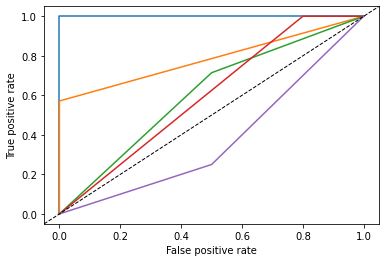



detail results in dictionary "cv_score_dict" using model_name as key
Performace summary in df "cv_score_mean" and "cv_score_sem"


,F1,precision,recall,accuracy
RF,0.69,0.71,0.71,0.68


In [36]:

#make sure datasets are converted from pandas DataFrame into numpy ndarray avoid errors in machine learning.
  
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0) #same random_state as previous GS

#setting up models using tuned hyperparameters from Grid Search.
#GBDT = GradientBoostingClassifier(random_state=42).set_params(**GBDT_tuned_params)
RF = RandomForestClassifier(random_state=42).set_params(**RF_tuned_params)
LR = LogisticRegression(random_state=42).set_params(**LR_tuned_params)
#SVM = SVC(random_state=42).set_params(**SVM_tuned_params)

#create dictionary to store k-fold CV results
cv_score_dict = {}
#create a dataframe to store the mean and standard error of the mean (SEM) from k-fold CV
cv_score_mean = pd.DataFrame()
cv_score_sem = pd.DataFrame()

#run k-fold CV
for clf, model_name in zip([RF], ['RF']):#'RF','GBDT','LR','SVM'
    #clf = eval(model_name)
    cv_score_dict[model_name] = kf_cv(clf,X_train,Y_train,5,True)
    cv_score_mean[model_name] = cv_score_dict[model_name].mean()[:-1]
    cv_score_sem[model_name] = cv_score_dict[model_name].sem()
    
cv_score_mean = cv_score_mean.transpose().astype(float).round(2)
cv_score_sem = cv_score_sem.transpose().round(2)

print('\n\ndetail results in dictionary "cv_score_dict" using model_name as key')
print('Performace summary in df "cv_score_mean" and "cv_score_sem"')

# check mean performance of each model.
cv_score_mean

In [37]:
cv_score_dict['RF']

,F1,precision,recall,accuracy,ROC_AUC,confusion_matrix
0,1.000000,1.000000,1.000000,1.000000,1.000000,"[[5, 0], [0, 6]]"
1,0.727273,1.000000,0.571429,0.727273,0.785714,"[[4, 0], [3, 4]]"
2,0.714286,0.714286,0.714286,0.636364,0.785714,"[[2, 2], [2, 5]]"
3,0.750000,0.600000,1.000000,0.636364,0.933333,"[[1, 4], [0, 6]]"
4,0.250000,0.250000,0.250000,0.400000,0.416667,"[[3, 3], [3, 1]]"


In [30]:
cv_score_dict['LR']

,F1,precision,recall,accuracy,ROC_AUC,confusion_matrix
0,0.800000,0.666667,1.000000,0.727273,0.666667,"[[2, 3], [0, 6]]"
1,0.923077,1.000000,0.857143,0.909091,0.928571,"[[4, 0], [1, 6]]"
2,0.615385,0.666667,0.571429,0.545455,0.642857,"[[2, 2], [3, 4]]"
3,0.666667,0.555556,0.833333,0.545455,0.533333,"[[1, 4], [1, 5]]"
4,0.666667,1.000000,0.500000,0.800000,0.916667,"[[6, 0], [2, 2]]"


Text(0.5, 1.0, 'CV_plot_metrics')

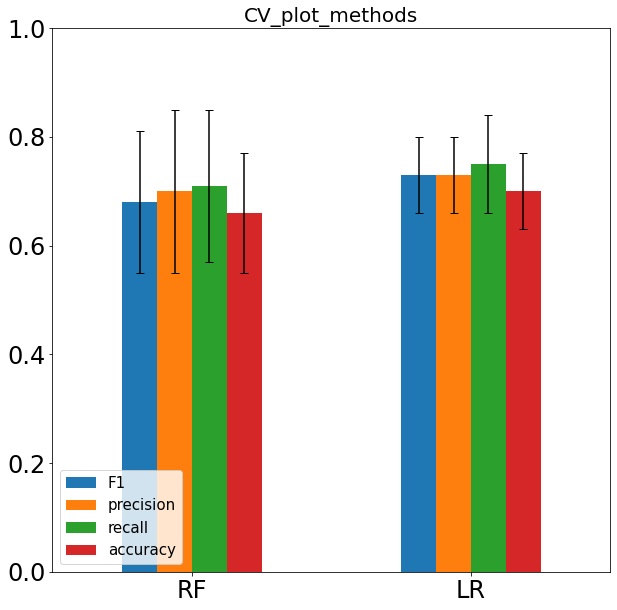

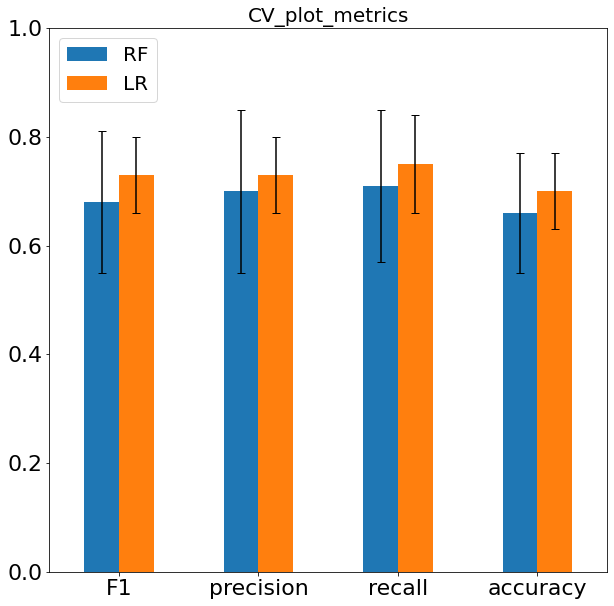

In [19]:
#plot k-fold CV by methods
CV_plot_methods = cv_score_mean.plot(ylim = (0,1), kind = 'bar', 
                                    rot = 0 , stacked = False,
                                    yerr = cv_score_sem, capsize=4,
                                    figsize = (10,10), fontsize = 24)
plt.legend(loc=3, prop={'size': 15})
plt.title('CV_plot_methods',fontsize = 20)
#plt.savefig(img_dir + "CV_plot_methods.png")


#plot k-fold CV by metrics
CV_plot_metrics = cv_score_mean.transpose().plot(kind = 'bar', ylim = (0,1),
                                                rot = 0, stacked = False,
                                                yerr = cv_score_sem.transpose(), capsize=4,
                                                figsize = (10,10), fontsize = 22)
plt.legend(loc=2, prop={'size': 20})
plt.title('CV_plot_metrics',fontsize = 20)
#plt.savefig(img_dir + "CV_plot_metrics.png")

In [19]:
#create a dataframe to store test set performance
test_set_result = pd.DataFrame()
f1,prec,recall,acc,ROC_AUC,conf = ([],[],[],[],[],[])

#evaluate the performance of the different classifiers
for model_name in ['RF', 'LR']:#'RF','GBDT','LR','SVM'
    clf = eval(model_name)

    clf.fit(X_train, Y_train)

    pred_test = clf.predict(X_test)
    pred_test_probs = clf.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(Y_test,pred_test)

    f1.append(f1_score(Y_test,pred_test))
    prec.append(precision_score(Y_test,pred_test))
    recall.append(recall_score(Y_test,pred_test))
    acc.append(accuracy_score(Y_test,pred_test))
    ROC_AUC.append(roc_auc_score(Y_test, pred_test_probs[:,1]))       
    conf.append(confusion_matrix(Y_test,pred_test))
    
test_set_scores = zip(f1,prec,recall,acc,ROC_AUC,conf)   

test_set_result = pd.DataFrame(test_set_scores, 
                               columns=['F1','precision','recall',
                                        'accuracy','ROC_AUC','confusion_matrix'], 
                               index = ['RF', 'LR'])#'RF','GBDT','LR','SVM'
test_set_result.round(2)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


,F1,precision,recall,accuracy,ROC_AUC,confusion_matrix
RF,0.57,0.50,0.67,0.57,0.62,"[[4, 4], [2, 4]]"
LR,0.62,0.57,0.67,0.64,0.60,"[[5, 3], [2, 4]]"


Text(0.5, 1.0, 'test_set_plot_metrics')

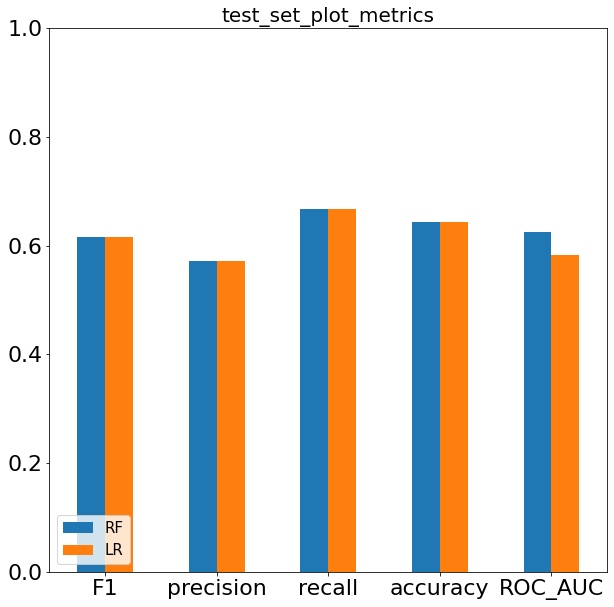

In [21]:
test_set_plot_metrics = test_set_result.iloc[:,:-1].transpose().plot(kind = 'bar', ylim = (0,1),
                                                rot = 0, stacked = False, legend=False,
                                                figsize = (10,10), fontsize = 22)

plt.legend(loc=3, prop={'size': 15})
plt.title('test_set_plot_metrics',fontsize = 20)
#plt.savefig(img_dir + "test_set_plot_metrics.png")